<h1 id="tocheading">NumPy基础 Chapter3</h1>
<div id="toc"></div>

### 本节知识点

1. loadtxt, savetxt
2. eye 单位矩阵, ones 全1, convolve 指定权重卷积
3. average, mean, median, min, max, std, var
4. diff, log自然对数
5. loadtxt 默认转浮点数，converters 指定转换函数
6. apply_along_axis
7. exp, linspace
8. fill

In [133]:
import numpy as np
i2 = np.eye(2)
i2

array([[ 1.,  0.],
       [ 0.,  1.]])

In [134]:
np.savetxt('output/eye.txt', i2)

In [135]:
# fh = open('input/600436_sublime_utf8_no_head.txt',encoding='utf8')
fh = open('input/600436_sublime_utf8_no_head.csv',encoding='utf8')


In [136]:
# 不好，只能按行，而且csv文件不能有head
# unpack 不同列数据分开存储
# 不能有任何中文
# 日期也不能读
c,v = np.loadtxt('input/600436_sublime_utf8_no_head.csv', delimiter=',', usecols=(4,7), unpack=True)

In [137]:
c

array([  1.97,   2.  ,   1.93, ...,  64.32,  64.2 ,  66.02])

In [138]:
v

array([ 20699084.,   5684036.,   3902889., ...,   7757334.,   9501911.,
        10721024.])

In [139]:
np.mean(c)

17.148567685589519

In [140]:
t=np.arange(len(c))
t

array([   0,    1,    2, ..., 3432, 3433, 3434])

### 时间加权平均，越近，权重越高

In [141]:

np.average(c,weights=t)

25.529569202232324

In [142]:
np.max(c)

66.019999999999996

In [143]:
np.min(c)

0.93000000000000005

In [144]:
np.var(c)

252.22229611441429

In [145]:
np.mean((c - c.mean())**2)

252.22229611441429

In [146]:
np.msort(c)

array([  0.93,   0.93,   0.94, ...,  64.89,  65.2 ,  66.02])

>方差：
各个数据与所有数据算术平均数的离差平方和除以数据个数。

样本方差和总体方差分母有区别，样本方差使用自由度。

In [147]:
# 自己算怎么不对？
c.std()

15.88150799245507

In [148]:
(np.var(c))/len(c)

0.07342716044087752

In [149]:
np.sqrt((np.var(c))/len(c))

0.27097446455501584

### diff函数，返回一个由相邻数组元素的差值构成的数组

In [150]:
# 每天收益率
np.diff(c)/c[:-1]

array([ 0.01522843, -0.035     ,  0.01036269, ..., -0.00786673,
       -0.00186567,  0.02834891])

In [151]:
# 对数每天收益率
log_return = np.diff(np.log(c))
log_return

array([ 0.01511364, -0.03562718,  0.01030937, ..., -0.00789783,
       -0.00186741,  0.02795452])

In [152]:
np.where(log_return > 0)

(array([   0,    2,    4, ..., 3428, 3429, 3433]),)

In [153]:
# 波动率
np.std(log_return)/np.mean(log_return)

29.095895442515573

In [154]:
# 年均波动
(np.std(log_return)/np.mean(log_return))/np.sqrt(1./252.)

461.88302108180289

In [155]:
(np.std(log_return)/np.mean(log_return))/np.sqrt(1./12.)

100.79113839629744

## 日期分析

In [156]:
import datetime
def datestr2num(s):
    return datetime.datetime.strptime(s.decode(), "%Y-%m-%d").date().weekday()


dates,close = np.loadtxt('input/600436_sublime_utf8_no_head.csv', delimiter=',', usecols=(0,4), converters={0:datestr2num}, unpack=True)

In [157]:
def datestr2datetime(s):
    return datetime.datetime.strptime(s.decode(), "%Y-%m-%d").date()
dates_year,close = np.loadtxt('input/600436_sublime_utf8_no_head.csv', \
                              delimiter=',', \
                              dtype= [('dates_year',datetime.date),('close',np.float)],
                              usecols=(0,4), \
                              converters={0:datestr2datetime},
                              unpack=True)

# 以下写法，比较日期时，没办法过滤出 需要的日期
# dates_year,close = np.loadtxt('input/600436_sublime_utf8_no_head.csv', \
#                               delimiter=',', \
#                               dtype= object,
#                               usecols=(0,4), \
#                               converters={0:datestr2datetime,
#                                          4: np.float},
#                               unpack=True)

In [158]:
dates

array([ 0.,  1.,  2., ...,  2.,  3.,  4.])

In [159]:
averages = np.zeros(5)
averages

array([ 0.,  0.,  0.,  0.,  0.])

__where 函数__

In [160]:
for i in range(5):
    indices = np.where(dates ==i)
    prices = np.take(close, indices)
    avg = np.mean(prices)
    averages[i]=avg

In [161]:
averages

array([ 17.14001499,  17.16056358,  17.21121602,  17.11965268,  17.11007289])

In [162]:
averages.argmax()

2

### 仅使用2017年数据

In [163]:
year_end_2016 = datetime.datetime.strptime('2016-12-31','%Y-%m-%d').date()

In [164]:
dates_2017 = np.ravel(np.take(dates_year, np.where(dates_year>year_end_2016)))
close_2017 = np.ravel(np.take(close, np.where(dates_year>year_end_2016)))

In [165]:
dates_year

array([datetime.date(2003, 6, 16), datetime.date(2003, 6, 17),
       datetime.date(2003, 6, 18), ..., datetime.date(2017, 10, 25),
       datetime.date(2017, 10, 26), datetime.date(2017, 10, 27)], dtype=object)

In [166]:
type(dates_2017)

numpy.ndarray

In [167]:
dates_2017.ndim

1

In [168]:
dates_2017.shape

(199,)

In [169]:
for index in range(0, len(dates_2017)):
    pass

len(dates_2017)

199

In [170]:
datetime.datetime.strptime('2017-10-22','%Y-%m-%d').date().isocalendar()

(2017, 42, 7)

In [171]:
week_index_2017 = [x.isocalendar()[1] for x in dates_2017]

# 0 星期一，4 星期五
week_day_2017 = [x.weekday() for x in dates_2017]
data_2017 = np.dstack((week_index_2017,week_day_2017, close_2017))

In [172]:
data_2017.shape

(1, 199, 3)

In [173]:
data_2017.reshape(199,3,)
data_2017 = data_2017.ravel().reshape(199,3)
data_2017.shape

(199, 3)

In [174]:
dates_2017.shape

(199,)

In [175]:
data_2017[0:11]

array([[  1.  ,   1.  ,  45.36],
       [  1.  ,   2.  ,  45.58],
       [  1.  ,   3.  ,  45.36],
       [  1.  ,   4.  ,  45.13],
       [  2.  ,   0.  ,  44.88],
       [  2.  ,   1.  ,  44.78],
       [  2.  ,   2.  ,  44.53],
       [  2.  ,   3.  ,  44.26],
       [  2.  ,   4.  ,  44.66],
       [  3.  ,   0.  ,  45.21],
       [  3.  ,   1.  ,  44.99]])

In [176]:
from itertools import groupby
from operator import itemgetter

In [177]:
group_map = {}

for key, value in groupby(data_2017,key = itemgetter(0)):
    group_map[key] = np.vstack(value)
    
group_map

{1.0: array([[  1.  ,   1.  ,  45.36],
        [  1.  ,   2.  ,  45.58],
        [  1.  ,   3.  ,  45.36],
        [  1.  ,   4.  ,  45.13]]), 2.0: array([[  2.  ,   0.  ,  44.88],
        [  2.  ,   1.  ,  44.78],
        [  2.  ,   2.  ,  44.53],
        [  2.  ,   3.  ,  44.26],
        [  2.  ,   4.  ,  44.66]]), 3.0: array([[  3.  ,   0.  ,  45.21],
        [  3.  ,   1.  ,  44.99],
        [  3.  ,   2.  ,  45.09],
        [  3.  ,   3.  ,  44.72],
        [  3.  ,   4.  ,  44.92]]), 4.0: array([[  4.  ,   0.  ,  44.99],
        [  4.  ,   1.  ,  44.91],
        [  4.  ,   2.  ,  44.98],
        [  4.  ,   3.  ,  44.97]]), 5.0: array([[  5.  ,   4.  ,  44.93]]), 6.0: array([[  6.  ,   0.  ,  44.86],
        [  6.  ,   1.  ,  44.53],
        [  6.  ,   2.  ,  44.59],
        [  6.  ,   3.  ,  44.68],
        [  6.  ,   4.  ,  44.89]]), 7.0: array([[  7.  ,   0.  ,  45.43],
        [  7.  ,   1.  ,  45.3 ],
        [  7.  ,   2.  ,  44.99],
        [  7.  ,   3.  ,  45.06],
       

In [178]:
np.unique(week_index_2017)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 41, 42, 43])

In [179]:
# start from 1
group_map[1]

array([[  1.  ,   1.  ,  45.36],
       [  1.  ,   2.  ,  45.58],
       [  1.  ,   3.  ,  45.36],
       [  1.  ,   4.  ,  45.13]])

In [180]:
type(group_map[1])

numpy.ndarray

In [181]:
group_map[2].ravel().shape[0]

15

In [182]:
# ?np.apply_along_axis

# 有第一个收盘价 模拟周开盘
def summarize(week_item):
    
    trade_price = week_item[:,2]
    week_high = np.max(trade_price)
    week_low = np.min(trade_price)
    week_open = trade_price[0]
    week_close = trade_price[-1]
    week_index = int(week_item.ravel()[0])
    return np.array([week_index, week_open, week_close, week_high, week_low])
    

In [183]:
week_info =  np.array([])

for item in group_map:
    trans = summarize(group_map[item])
    
    if len(week_info) != 0:
    
        week_info = np.row_stack((week_info,trans))
    else:
        week_info = trans

In [184]:
week_info 

array([[  1.  ,  45.36,  45.13,  45.58,  45.13],
       [  2.  ,  44.88,  44.66,  44.88,  44.26],
       [  3.  ,  45.21,  44.92,  45.21,  44.72],
       [  4.  ,  44.99,  44.97,  44.99,  44.91],
       [  5.  ,  44.93,  44.93,  44.93,  44.93],
       [  6.  ,  44.86,  44.89,  44.89,  44.53],
       [  7.  ,  45.43,  44.88,  45.43,  44.88],
       [  8.  ,  45.95,  47.21,  47.37,  45.88],
       [  9.  ,  47.54,  46.98,  47.76,  46.98],
       [ 10.  ,  47.38,  47.58,  47.61,  47.01],
       [ 11.  ,  48.23,  47.41,  48.23,  47.41],
       [ 12.  ,  47.82,  50.24,  50.48,  47.82],
       [ 13.  ,  49.74,  50.02,  50.02,  48.85],
       [ 14.  ,  51.8 ,  52.61,  52.61,  51.8 ],
       [ 15.  ,  54.48,  53.04,  54.48,  53.  ],
       [ 16.  ,  52.56,  56.45,  57.7 ,  52.56],
       [ 17.  ,  55.5 ,  54.91,  57.69,  54.91],
       [ 18.  ,  55.3 ,  53.12,  55.65,  53.12],
       [ 19.  ,  53.24,  55.37,  55.37,  53.24],
       [ 20.  ,  55.65,  54.86,  56.22,  54.34],
       [ 21.  ,  55.

### 卷积

一个函数与经过翻转和平移的另一个函数的乘积的积分。

In [185]:
import sys

In [186]:
# N = int(sys.argv[1])
N = 10
weights = np.ones(N)/N

In [187]:
weights

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [188]:
week_info.shape

(42, 5)

In [189]:
# all close
week_close = week_info[:,1]

In [190]:
# 计算卷积
sma = np.convolve(weights, close_2017)[N-1: -N+1] 
t = np.arange(N -1, len(close_2017))

In [191]:
close_2017.shape

(199,)

In [192]:
sma.shape

(190,)

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

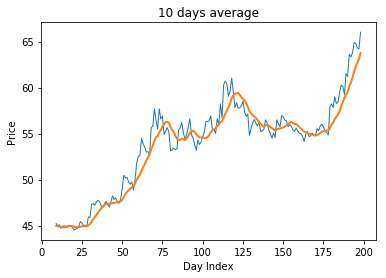

In [194]:
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.title('{} days average'.format(N))

plt.plot(t,close_2017[N-1:],lw=1.0)
plt.plot(t, sma, lw=2.0)

# plt.plot(t,close_2017[N-1:], lw=1.0)
# show()

### 指数移动平均线

exponential moving average

In [195]:
x = np.arange(5)
np.exp(x)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,  54.59815003])

In [196]:
np.linspace(-1, 0, 5)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ])

In [197]:
def set_weights(N):
    weights_array = np.exp(np.linspace(-1, 0, N))
    # 归一化
    weights_array /= weights_array.sum()
    return weights_array

In [198]:
N = 10
weights = set_weights(N)

In [199]:
weights

array([ 0.05767151,  0.06444901,  0.072023  ,  0.08048708,  0.08994584,
        0.10051619,  0.11232876,  0.12552954,  0.14028165,  0.15676742])

In [200]:
# 计算卷积
sma = np.convolve(weights, close_2017)[N-1: -N+1] 
t = np.arange(N -1, len(close_2017))

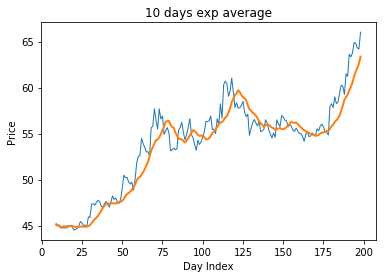

In [201]:
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.title('{} days exp average'.format(N))

plt.plot(t,close_2017[N-1:],lw=1.0)
plt.plot(t, sma, lw=2.0)

### 布林带

In [202]:
N= 20
weights_20 = set_weights(N)

In [203]:
sma_20 = np.convolve(weights_20, close_2017)[N-1: -N+1] 
t_20 = np.arange(N -1, len(close_2017))

In [204]:
deviation = []
C = len(close_2017)

for i in range(N -1, C):
    if i+N <C:
        dev = close_2017[i: i+N]
    else:
        dev = close_2017[-N:]
        
    averages = np.zeros(N)
    averages.fill(sma[i-N -1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
    
deviation = 2 * np.array(deviation)
upperBB = sma_20 + deviation
lowerBB = sma_20 - deviation

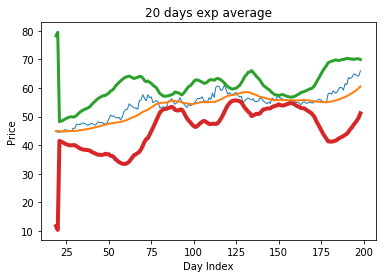

In [205]:
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.title('{} days exp average'.format(N))

plt.plot(t_20,close_2017[N-1:],lw=1.0)
plt.plot(t_20, sma_20, lw=2.0)
plt.plot(t_20, upperBB, lw=3.0)
plt.plot(t_20, lowerBB, lw=4.0)

### 线性模型

In [206]:
N=5
b = close_2017[-N:]
b

array([ 64.89,  64.83,  64.32,  64.2 ,  66.02])

In [207]:
b = b[::-1]
b

array([ 66.02,  64.2 ,  64.32,  64.83,  64.89])

In [208]:
A = np.zeros((N,N),float)
A

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [209]:
for i in range(N):
    A[i,] = close_2017[-N -1 -i : -1 -i]
    
A

array([[ 63.75,  64.89,  64.83,  64.32,  64.2 ],
       [ 63.34,  63.75,  64.89,  64.83,  64.32],
       [ 63.63,  63.34,  63.75,  64.89,  64.83],
       [ 61.22,  63.63,  63.34,  63.75,  64.89],
       [ 61.51,  61.22,  63.63,  63.34,  63.75]])

In [210]:
# 用最小二乘法拟合数据得到一个形如y = mx + c的线性方程
# lstsq 是 LeaST SQuare （最小二乘

(x, residuals, rank, s) = np.linalg.lstsq(A,b)

In [211]:
print("系数向量: {}\n残差数组: {}\n轶: {}\n奇异值:{}".format(x,residuals, rank,s))

系数向量: [ 1.35538357 -0.22023188  1.19073974 -3.67164565  2.38114851]
残差数组: []
轶: 5
奇异值:[ 318.79971819    1.86963496    1.75471526    1.0877576     0.3229591 ]


In [212]:
# 最近N个价格构成的向量点积
# 即预测股价

np.dot(b,x)

68.411856627666793

### 趋势线

In [213]:
def fit_line(t, y):
    A = np.vstack([t, np.ones_like(t)]).T
    return np.linalg.lstsq(A, y)[0]
h, l, c,v = np.loadtxt('input/600436_sublime_utf8_no_head.csv', delimiter=',', usecols=(2,3,4,7), unpack=True)
pivots =(h + l + c)/3

In [214]:

t = np.arange(len(c))
sa, sb = fit_line(t, pivots - (h-l))
ra, rb = fit_line(t, pivots + (h-l))

support = sa * t + sb
resistance = ra * t + rb

In [215]:
condition = (c>support) & (c< resistance)
condition

array([False, False, False, ..., False, False, False], dtype=bool)

In [216]:
between_bands = np.where(condition)

In [217]:
support[between_bands]

array([  2.6169647 ,   2.63117569,   2.64538667,   2.65959765,
         2.67380863,   2.68801961,   2.7022306 ,   2.71644158,
         2.75907452,   2.77328551,   3.07171612,   3.08592711,
         3.14277103,   3.15698201,   3.171193  ,   3.27066987,
         3.28488085,   3.29909183,   3.31330282,   3.3275138 ,
         3.35593576,   3.37014674,   3.38435772,   3.39856871,
         3.41277969,   3.44120165,   3.72542129,   3.89595307,
         3.91016405,   3.92437503,   3.93858602,   3.952797  ,
         3.96700798,   3.98121896,   3.99542994,   4.00964093,
         4.02385191,   4.03806289,   6.78078239,   6.83762631,
         7.2355338 ,   7.24974479,   7.26395577,   7.27816675,
         7.29237773,   7.3207997 ,   7.34922166,   7.36343264,
         7.3918546 ,   7.49133148,   7.50554246,   7.53396442,
         7.5481754 ,   7.56238639,   7.60501933,   7.61923031,
         7.6334413 ,   7.69028522,   7.73291817,   7.74712915,
         7.77555111,   7.7897621 ,   7.80397308,   7.81

In [218]:
c[between_bands]

array([  2.9 ,   2.9 ,   2.74,   2.67,   2.74,   2.79,   2.84,   2.82,
         2.83,   2.86,   3.43,   3.4 ,   3.5 ,   3.5 ,   3.51,   3.65,
         3.58,   3.65,   3.65,   3.52,   3.46,   3.53,   3.57,   3.49,
         3.49,   3.46,   3.76,   4.02,   4.06,   4.32,   4.27,   4.09,
         4.25,   4.1 ,   4.3 ,   4.12,   4.25,   4.23,   7.03,   7.07,
         7.29,   7.32,   7.57,   7.63,   7.75,   7.9 ,   7.85,   7.8 ,
         7.98,   8.08,   7.98,   8.06,   7.94,   8.  ,   8.04,   7.91,
         7.65,   7.77,   7.94,   7.78,   8.37,   8.29,   8.24,   8.4 ,
         8.18,   8.45,   8.38,   8.08,   7.91,   8.29,   8.14,   8.47,
         8.47,   8.4 ,   8.2 ,  18.4 ,  18.48,  18.55,  17.79,  17.87,
        17.94,  17.89,  17.97,  17.51,  17.58,  18.06,  18.08,  17.63,
        17.63,  17.7 ,  23.26,  23.61,  24.39,  24.44,  24.1 ,  23.92,
        24.31,  23.94,  23.29,  24.23,  24.48,  24.48,  24.38,  23.67,
        24.37,  24.45,  24.2 ,  23.65,  23.29,  23.24,  23.31,  23.63,
      

In [219]:
resistance[between_bands]

array([  2.95769311,   2.97274462,   2.98779613,   3.00284764,
         3.01789915,   3.03295066,   3.04800217,   3.06305368,
         3.10820821,   3.12325972,   3.43934144,   3.45439295,
         3.51459899,   3.5296505 ,   3.54470201,   3.65006258,
         3.66511409,   3.6801656 ,   3.69521711,   3.71026862,
         3.74037164,   3.75542315,   3.77047466,   3.78552617,
         3.80057768,   3.8306807 ,   4.13171091,   4.31232903,
         4.32738054,   4.34243205,   4.35748356,   4.37253507,
         4.38758658,   4.40263809,   4.4176896 ,   4.43274111,
         4.44779262,   4.46284413,   7.36778561,   7.42799165,
         7.84943393,   7.86448545,   7.87953696,   7.89458847,
         7.90963998,   7.939743  ,   7.96984602,   7.98489753,
         8.01500055,   8.12036112,   8.13541263,   8.16551565,
         8.18056716,   8.19561867,   8.2407732 ,   8.25582471,
         8.27087622,   8.33108226,   8.37623679,   8.3912883 ,
         8.42139132,   8.43644283,   8.45149434,   8.46

In [220]:
len(np.ravel(between_bands))

211

In [221]:
"明日支撑 {}".format(sa * (t[-1] + 1) + sb)

'明日支撑 40.97240470314693'

In [222]:
"明日阻力 {}".format(sa * (t[-1] + 1) + rb)

'明日阻力 40.694504212918446'

### 支撑 阻力 方法2

In [223]:
a1 = c[c>support]
a2 = c[c<resistance]

In [224]:
len(np.intersect1d(a1,a2))

305

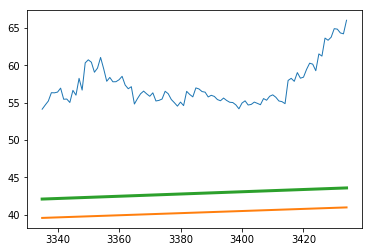

In [225]:
# plt.xlabel('Day Index')
# plt.ylabel('Price')
# plt.title('{} days exp average'.format(N))

plt.plot(t[-100:],c[-100:],lw=1.0)
plt.plot(t[-100:], support[-100:], lw=2.0)
plt.plot(t[-100:], resistance[-100:], lw=3.0)


### 数组的修剪和压缩

clip 返回一个修剪过的数组

compress 返回删选后的数组

In [226]:
a = np.arange(5)
print("a :{}".format(a))

a.clip(1,3)

a :[0 1 2 3 4]


array([1, 1, 2, 3, 3])

In [227]:
a.compress(a>2)

array([3, 4])

ndarray 中

1. prod 计算数组中所有元素乘积
2. cumprod计算数组元素累积乘积

In [228]:
b = np.arange(1,9)
b

array([1, 2, 3, 4, 5, 6, 7, 8])

In [229]:
b.prod()

40320

In [230]:
b.cumprod()

array([    1,     2,     6,    24,   120,   720,  5040, 40320])

In [231]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>